In [1]:
import sys
sys.path.append('/Users/zhengj10/Python/Modules')
import h5py
import os
import numpy as np
from skimage.io import imsave
import matplotlib.pyplot as plt
import yaml
import pandas as pd
import PatcherBot as pb
from glob import glob
import seaborn as sns
import scipy.signal as ss

#### Access raw image

In [3]:
rawPath = '/Users/zhengj10/Desktop'
# rawPath = '/Volumes/genie/Jihong_GENIE_stuff/'
os.path.exists(rawPath)

True

In [4]:
# datePath = pb.getPathInfo(rawPath)
datePath = ['2021.10.13_000']
datePath

['2021.10.13_000']

(-0.3043872877453999, 0.028494379805697585)


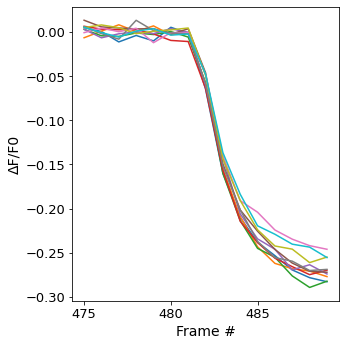

In [184]:
rawPath = '/Users/zhengj10/Desktop/2021.10.13_000/plate_000/patch_attempt_0001_002/camera_clamp1_for_kinetics_000'
plt.rc('font',size=13)
plt.figure(figsize=[5,5])
for trial in range(10):
    imgFiles = os.path.join(rawPath, str(trial).zfill(3), 'Camera', 'frames.ma')
    data = h5py.File(imgFiles,'r')
    imgData = data['data'][()]
    F = []
    Fb = np.min(imgData)
    for frame in range(imgData.shape[0]):
        f = np.sum(imgData[frame,:,:]*mask)/np.sum(mask)
        F.append(f)
#     plt.plot(F[475:490])
#     plt.plot(F[1465:1480])
    F = np.array(F)
    F0 = np.mean(F[300:400])
    dFF = (F-F0)/(F0-Fb)
#     plt.plot(dFF)
    plt.plot(np.arange(475,490),dFF[475:490])
#     print(imgData.shape)
# plt.plot([475,490,490,475,475],[0.032,0.032,-0.32,-0.32,0.032])
plt.xlabel('Frame #',size=14)
plt.ylabel('\u0394F/F0',size=14)
print(plt.ylim())
plt.tight_layout()
plt.savefig('/Users/zhengj10/Desktop/211020/dFF_zoom.png')
plt.show()

In [167]:
F0

42.75085365853659

In [101]:
daqFile = os.path.join(rawPath, str(trial).zfill(3), 'Camera', 'daqResult.ma')

In [102]:
daqData = h5py.File(daqFile,'r')

In [103]:
daqData.keys()

<KeysViewHDF5 ['data', 'info']>

In [125]:
imgData.shape

(1981, 508, 41)

In [132]:
img = np.mean(imgData[:400,:,:],axis=0)

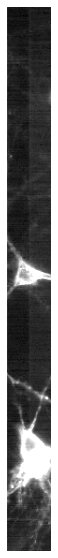

In [189]:
plt.figure(figsize=[1,12.5])
plt.imshow(img,cmap='gray',vmax=1800)
plt.axis('off')
plt.tight_layout()
plt.savefig('/Users/zhengj10/Desktop/211020/cell.png')
plt.show()


In [137]:
from scipy.stats import ttest_ind

In [154]:
A, B = ttest_ind(imgData[300:400,:,:],imgData[900:1100,:,:], axis=0)

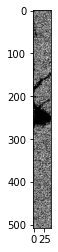

In [156]:
plt.imshow(B,cmap='gray')

In [157]:
B_flat = B.flatten()
B_sorted = sorted(B_flat)

In [160]:
mask = B<B_sorted[500]

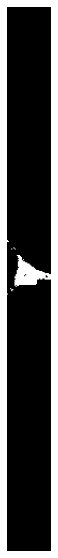

In [187]:
plt.figure(figsize=[1,12.5])
plt.axis('off')
plt.imshow(mask,cmap='gray')
plt.tight_layout()
plt.savefig('/Users/zhengj10/Desktop/211020/mask.png')
plt.show()


In [104]:
A = daqData['data'][()]
A_diff = np.diff(A)

In [105]:
i = 0

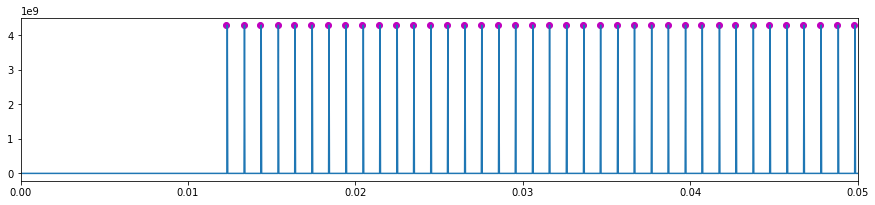

In [106]:

plt.figure(figsize=[15,3])
x = np.arange(2,80001)/40000.0
plt.plot(x,A_diff[0,:])
plt.scatter(peaks/40000.0,A_diff[0,:][peaks],color='m')
plt.xlim([i,i+0.05])
i+=0.05

In [107]:
peaks,_ = ss.find_peaks(A_diff[0,:],height=3)

In [190]:
peaks[481]/40000.0

0.49975

In [ ]:
# 0.49975, 0.500775

In [13]:
peaks.shape

(1962,)

In [14]:
imgData.shape

(1981, 508, 41)

In [16]:
daqFile

'/Users/zhengj10/Desktop/2021.10.13_000/plate_000/patch_attempt_0001_002/camera_clamp1_for_kinetics_000/009/Camera/daqResult.ma'

In [18]:
imgFiles

'/Users/zhengj10/Desktop/2021.10.13_000/plate_000/patch_attempt_0001_002/camera_clamp1_for_kinetics_000/009/Camera/frames.ma'

In [ ]:
# rawPath = '/Volumes/genie/Jihong_GENIE_stuff/patch_attempt_0030_000/I_clamp1_000'
# rawPath = '/Volumes/Backup Plus/PatcherBot/raw/2020.09.23_000/plate_001/patch_attempt_0017_000/I_clamp1_000'
entire_seq = []

for trial in range(10):
    imgFiles = os.path.join(rawPath, str(trial).zfill(3), 'Camera', 'frames.ma')
    data = h5py.File(imgFiles,'r')
    imgData = data['data'][()]
    imgData = imgData[:1500,:,:]
    entire_seq.append(imgData)
#     print(imgData.shape)
#     imsave('/Users/zhengj10/Desktop/VC/'+str(trial+1)+'.tif', imgData.astype('float32'))

entire_seq = np.array(entire_seq)
print(entire_seq.shape)

# entire_seq = entire_seq[2:,:,:]
# entire_seq.shape

In [ ]:
entire_seq = np.mean(entire_seq,axis=0)

In [ ]:
imsave('/Users/zhengj10/Desktop/3b.tif', entire_seq.astype('float32'))

In [ ]:
np.min(entire_seq)

In [ ]:
def roll_ave(imgFile):
    frames = []
    for frame in range(imgFile.shape[0]):

        if frame%10 == 0:
            ave_frame = np.mean(imgFile[frame:frame+4,:,:],axis=0)
            frames.append(ave_frame)
    frames = np.array(frames, dtype='float32')
    return frames
            
        


In [ ]:
newImg = roll_ave(entire_seq)
newImg.shape

In [ ]:
imsave('/Users/zhengj10/Desktop/roll_ave_L2.tif', newImg.astype('float32'))

In [ ]:
rawPath = '/Volumes/Backup Plus'

In [ ]:
for date in datePath:
    platePath = pb.getPathInfo(os.path.join(rawPath, date))
    plate = 'plate_000'
    for plate in platePath:
        cellPath = pb.getPathInfo(os.path.join(rawPath, date, plate))
        for cell in(cellPath):
            if not os.path.exists(os.path.join(rawPath, date, plate, cell,'camera_clamp1_for_kinetics_000')):
                continue
            for trial in range(8):
                imgFiles = glob(os.path.join(rawPath, date, plate, cell, 'camera_clamp1_for_kinetics_000', str(trial).zfill(3), 'Camera') + '/frames.ma')
                data = h5py.File(imgFiles[0],'r')
                imgData = data['data'][()]
                print(imgData.shape)


In [ ]:
import seaborn as sns

tips = sns.load_dataset("tips")

# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [ ]:
tips

In [ ]:
import time

In [ ]:
time.sleep(120)
print('shit')